In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup #BeautifulSoup is a Python library for pulling data out of HTML and XML files. It provides Pythonic idioms for iterating, searching, and modifying the parse tree.

import warnings     
warnings.filterwarnings('ignore') 

In [3]:
old_df = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')

In [4]:
old_df.shape

(404290, 6)

In [5]:
old_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# **EDA and Preprocessing**

In [6]:
df =old_df.sample(200000,random_state=2) 

In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [8]:
df= df.dropna()

In [9]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [10]:
df.shape

(199999, 6)

In [11]:
def preprocess(q):
     
    q = str(q).lower().strip()
    
    #Replaceing certain char with their string equivalent
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    #Replacing some no's with their string equivalent
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
     # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
    q_decontracted= []
    
    for word in q.split():
        if word in contractions:
            word= contractions[word]
            
    q_decontracted.append(word)
    
    q = ''.join(q_decontracted)
    q= q.replace("'ve","have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    #removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    #remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern,' ',q).strip()
    
    return q
    
    

In [12]:
df['question1'] =df['question1'].apply(preprocess)
df['question2']= df['question2'].apply(preprocess)

In [13]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,companies,companies,1
115086,115086,187729,187730,do,do,0
327711,327711,454161,454162,that,shit,0
367788,367788,498109,491396,states,psychopath,0
151235,151235,237843,50930,tragedy,tragedy,0


# **Feature Engineering**

In [14]:
#creating 2 new features to contain the length of ques1 and ques2
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [15]:
#creating 2 new features to get the number of words in each ques1 and ques2 respectively
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

#there are some flotting and NAN values in the dataset to avoid them use this-> (if pd.notna(row) else 0) ; here we have already droped those rows 

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,companies,companies,1,9,9,1,1
115086,115086,187729,187730,do,do,0,2,2,1,1
327711,327711,454161,454162,that,shit,0,4,4,1,1
367788,367788,498109,491396,states,psychopath,0,6,10,1,1
151235,151235,237843,50930,tragedy,tragedy,0,7,7,1,1


In [16]:
#function to return the common words in both ques ->adding new feature as word_common
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1&w2)

In [17]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,companies,companies,1,9,9,1,1,1
115086,115086,187729,187730,do,do,0,2,2,1,1,1
327711,327711,454161,454162,that,shit,0,4,4,1,1,0
367788,367788,498109,491396,states,psychopath,0,6,10,1,1,0
151235,151235,237843,50930,tragedy,tragedy,0,7,7,1,1,1


In [18]:
#function to return the total words in both ques ->adding new feature as total_words
def total_words(row):
    w1= set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return (len(w1)+ len(w2))

In [19]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,companies,companies,1,9,9,1,1,1,2
115086,115086,187729,187730,do,do,0,2,2,1,1,1,2
327711,327711,454161,454162,that,shit,0,4,4,1,1,0,2
367788,367788,498109,491396,states,psychopath,0,6,10,1,1,0,2
151235,151235,237843,50930,tragedy,tragedy,0,7,7,1,1,1,2


In [20]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,companies,companies,1,9,9,1,1,1,2,0.5
115086,115086,187729,187730,do,do,0,2,2,1,1,1,2,0.5
327711,327711,454161,454162,that,shit,0,4,4,1,1,0,2,0.0
367788,367788,498109,491396,states,psychopath,0,6,10,1,1,0,2,0.0
151235,151235,237843,50930,tragedy,tragedy,0,7,7,1,1,1,2,0.5


**Creating Advance Features**

In [21]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV =0.001
    STOP_WORDS = stopwords.words("english")
    
    token_features =[0.0]*8
    
    #converting sentence into tokens
    q1_tokens =q1.split()
    q2_tokens =q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    #on getting the non-stopwords in questins
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words =set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #on getting the stopwords in question
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    #ON GETIING the common non-stopwords form ques pairs
    common_word_count = len(q1_words.intersection(q2_words))
    
    #on getting the common stopwords from ques pairs
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    #on getting the common tokens from ques pairs
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0]= common_word_count /(min(len(q1_words),len(q2_words))+ SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    #check for last word of both question is same or not
    token_features[6]= int(q1_tokens[-1]==q2_tokens[-1])
    #check for first word of both ques is same or not
    token_features[7]= int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [22]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [23]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,companies,companies,1,9,9,1,1,...,2,0.5,0.999001,0.999001,0.000000,0.000000,0.999001,0.999001,1.0,1.0
115086,115086,187729,187730,do,do,0,2,2,1,1,...,2,0.5,0.000000,0.000000,0.999001,0.999001,0.999001,0.999001,1.0,1.0
327711,327711,454161,454162,that,shit,0,4,4,1,1,...,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
367788,367788,498109,491396,states,psychopath,0,6,10,1,1,...,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,tragedy,tragedy,0,7,7,1,1,...,2,0.5,0.999001,0.999001,0.000000,0.000000,0.999001,0.999001,1.0,1.0


In [24]:
from difflib import SequenceMatcher
def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    return length_features
    

In [25]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))

In [26]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len
398782,398782,496695,532029,companies,companies,1,9,9,1,1,...,0.999001,0.999001,0.000000,0.000000,0.999001,0.999001,1.0,1.0,0.0,1.0
115086,115086,187729,187730,do,do,0,2,2,1,1,...,0.000000,0.000000,0.999001,0.999001,0.999001,0.999001,1.0,1.0,0.0,1.0
327711,327711,454161,454162,that,shit,0,4,4,1,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
367788,367788,498109,491396,states,psychopath,0,6,10,1,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
151235,151235,237843,50930,tragedy,tragedy,0,7,7,1,1,...,0.999001,0.999001,0.000000,0.000000,0.999001,0.999001,1.0,1.0,0.0,1.0


# **Analysis of features**

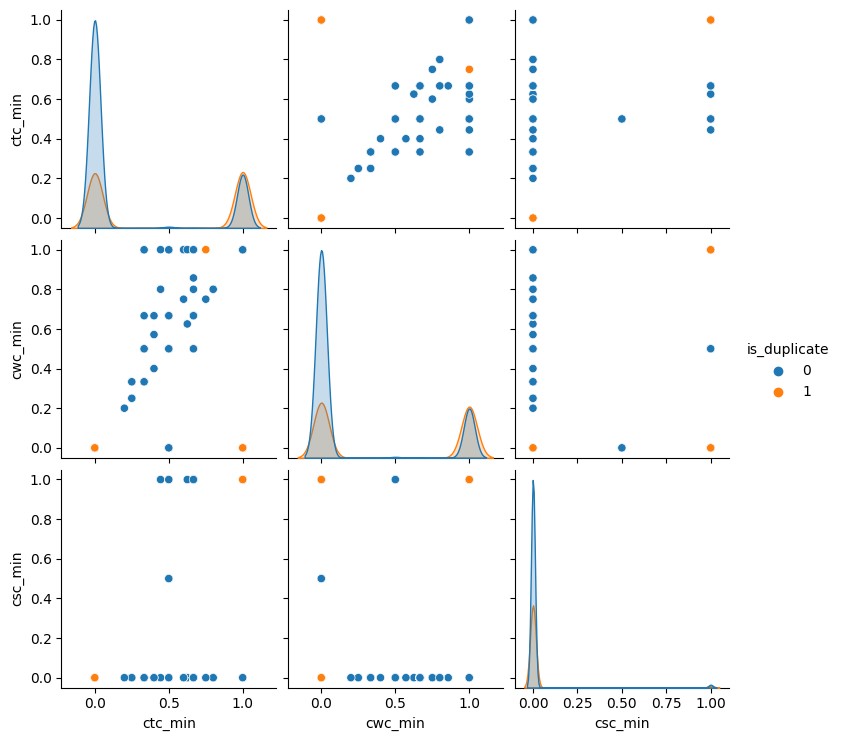

In [27]:
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

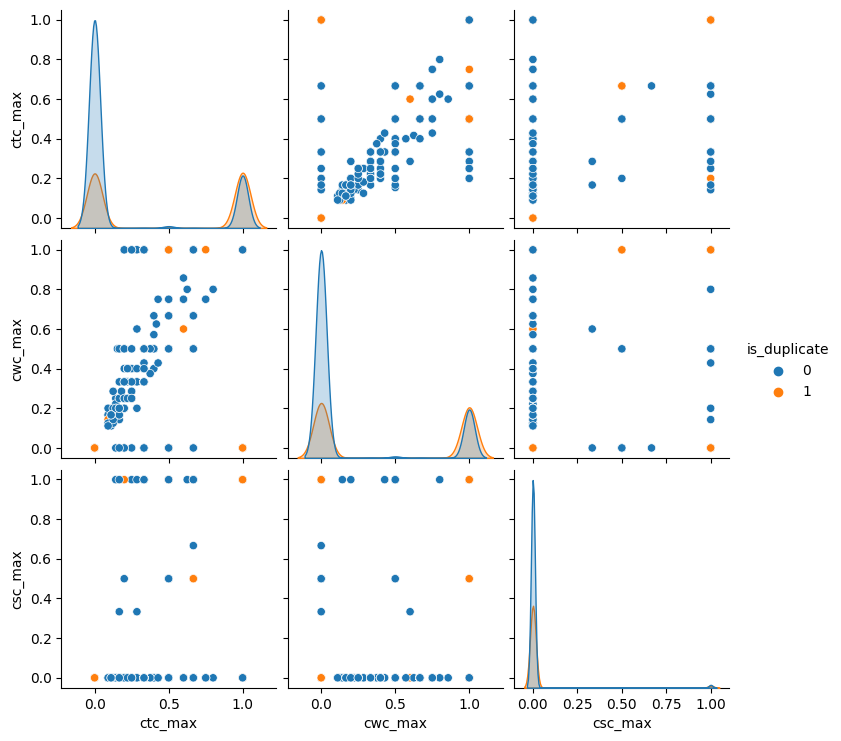

In [28]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

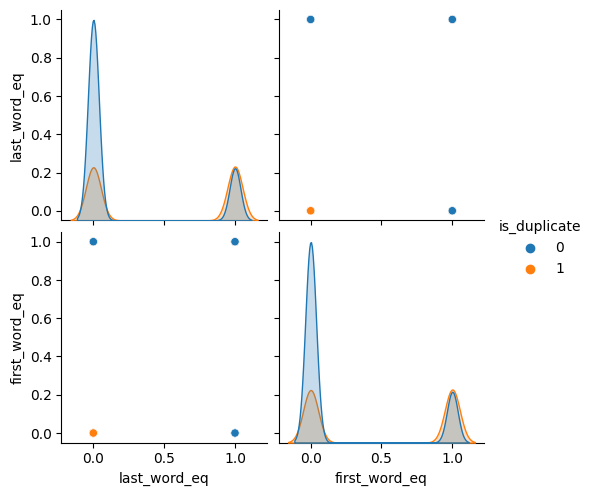

In [29]:
sns.pairplot(df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

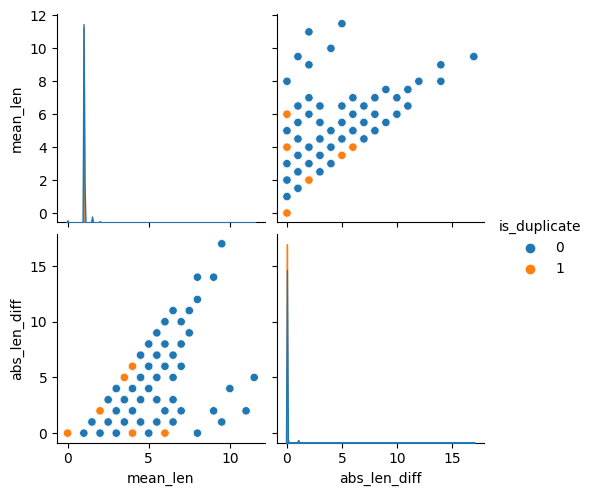

In [30]:
sns.pairplot(df[['mean_len', 'abs_len_diff', 'is_duplicate']],hue='is_duplicate')

In [31]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len']])
y = df['is_duplicate'].values

In [32]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 199999 samples in 0.274s...
[t-SNE] Computed neighbors for 199999 samples in 398.621s...
[t-SNE] Computed conditional probabilities for sample 1000 / 199999
[t-SNE] Computed conditional probabilities for sample 2000 / 199999
[t-SNE] Computed conditional probabilities for sample 3000 / 199999
[t-SNE] Computed conditional probabilities for sample 4000 / 199999
[t-SNE] Computed conditional probabilities for sample 5000 / 199999
[t-SNE] Computed conditional probabilities for sample 6000 / 199999
[t-SNE] Computed conditional probabilities for sample 7000 / 199999
[t-SNE] Computed conditional probabilities for sample 8000 / 199999
[t-SNE] Computed conditional probabilities for sample 9000 / 199999
[t-SNE] Computed conditional probabilities for sample 10000 / 199999
[t-SNE] Computed conditional probabilities for sample 11000 / 199999
[t-SNE] Computed conditional probabilities for sample 12000 / 199999
[t-SNE] Computed conditional proba

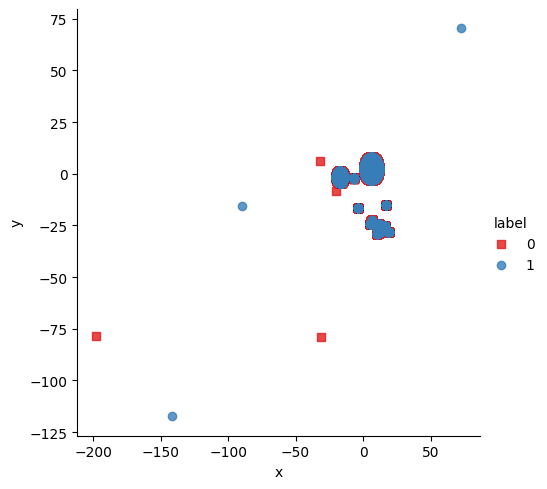

In [33]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, palette="Set1", markers=['s', 'o'])

In [34]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
398782,companies,companies
115086,do,do
327711,that,shit
367788,states,psychopath
151235,tragedy,tragedy


In [35]:
final_df = df.drop(columns=(['id','qid1','qid2','question1','question2']))
print(final_df.shape)
final_df.head()

(199999, 18)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len
398782,1,9,9,1,1,1,2,0.5,0.999001,0.999001,0.000000,0.000000,0.999001,0.999001,1.0,1.0,0.0,1.0
115086,0,2,2,1,1,1,2,0.5,0.000000,0.000000,0.999001,0.999001,0.999001,0.999001,1.0,1.0,0.0,1.0
327711,0,4,4,1,1,0,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
367788,0,6,10,1,1,0,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
151235,0,7,7,1,1,1,2,0.5,0.999001,0.999001,0.000000,0.000000,0.999001,0.999001,1.0,1.0,0.0,1.0


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
 # merging text
ques= list(ques_df['question1'])+list(ques_df['question2'])

cv =CountVectorizer(max_features=1500)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(ques).toarray(),2)


In [37]:
df1 = pd.DataFrame(q1_arr, index= ques_df.index)
df2 = pd.DataFrame(q2_arr, index= ques_df.index)
df3 = pd.concat([df1,df2],axis=1)
df3.shape

(199999, 3000)

In [38]:
final_df = pd.concat([final_df,df3],axis=1)
print(final_df.shape)
final_df.head()

(199999, 3018)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
398782,1,9,9,1,1,1,2,0.5,0.999001,0.999001,...,0,0,0,0,0,0,0,0,0,0
115086,0,2,2,1,1,1,2,0.5,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
327711,0,4,4,1,1,0,2,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
367788,0,6,10,1,1,0,2,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
151235,0,7,7,1,1,1,2,0.5,0.999001,0.999001,...,0,0,0,0,0,0,0,0,0,0


# **Models**

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [40]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred1 = rf.predict(X_test)
accuracy_score(y_test,y_pred1)

0.71385

In [41]:
#XG Boost
from xgboost import XGBClassifier
xgb =XGBClassifier()
xgb.fit(X_train,y_train)
y_pred2 =xgb.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7118

In [42]:
#Softmax Regression
from sklearn.linear_model import LogisticRegression
sm = LogisticRegression(multi_class='multinomial')
sm.fit(X_train,y_train)
y_pred3= sm.predict(X_test)
accuracy_score(y_test,y_pred3)

0.7174

In [43]:
# In this problem confusion metics also be a better metrics as me want to know how much not duplicated ques get predicted as non duplicate and non duplicate predicted as duplicate
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[19414,  5889],
       [ 5557,  9140]])

In [44]:
confusion_matrix(y_test,y_pred2)

array([[20853,  4450],
       [ 7078,  7619]])

In [45]:
confusion_matrix(y_test,y_pred3)

array([[21266,  4037],
       [ 7267,  7430]])

Out of the used model Random Forest is giving the best accuracy result and also the number of False Negative outcomes is also less compared to the other algorithms. 
Here FN play crutial role as they can impact the user interation because they will get someother answer of the ques they asked because the question is assigned as duplicate so out of the 2 only 1 user will get the correct answer for those who come under FN.
so RF is the best algo here.